In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
business_file_path = '/content/drive/MyDrive/CIS_509/yelp_dataset/yelp_academic_dataset_business.json'

In [6]:
business_df = pd.read_json(business_file_path, lines=True)

In [4]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [7]:
# Drop the columns we don't need
drop_columns = ['address', 'latitude', 'longitude']
business_df = business_df.drop(drop_columns, axis=1)

In [8]:
# Select the restaurant which is still open today
business_df = business_df[business_df['is_open']==1]

In [9]:
# Drop missing values from the categories column
business_df = business_df.dropna(subset=['categories'])

In [ ]:
# Select only Restaurants
business_df = business_df[business_df['categories'].str.contains('Restaurants')]

In [10]:
# Adding a new column names category, rename the categories name to the five cuisine types and check the null value
business_df['category']=pd.Series()
business_df.loc[business_df.categories.str.contains('American'),'category'] = 'American'
business_df.loc[business_df.categories.str.contains('Mexican'), 'category'] = 'Mexican'
business_df.loc[business_df.categories.str.contains('Italian'), 'category'] = 'Italian'
business_df.loc[business_df.categories.str.contains('Japanese'), 'category'] = 'Japanese'
business_df.loc[business_df.categories.str.contains('Chinese'), 'category'] = 'Chinese'
business_df.category[:5]

<ipython-input-10-f5bb21c64245>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  business_df['category']=pd.Series()


1    NaN
3    NaN
4    NaN
5    NaN
6    NaN
Name: category, dtype: object

In [11]:
# Drop missing values from the category column
business_df = business_df.dropna(subset=['category'])

In [12]:
# Select only California restaurants
business_df = business_df[business_df['state']== 'CA']

In [13]:
# Drop the categories column and the is_open column
drop_columns = ['categories', 'is_open']
business_df = business_df.drop(drop_columns, axis=1)

In [ ]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 470 to 150272
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   357 non-null    object 
 1   name          357 non-null    object 
 2   city          357 non-null    object 
 3   state         357 non-null    object 
 4   postal_code   357 non-null    object 
 5   stars         357 non-null    float64
 6   review_count  357 non-null    int64  
 7   attributes    353 non-null    object 
 8   hours         342 non-null    object 
 9   category      357 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 30.7+ KB


In [ ]:
business_df.head()

,business_id,name,city,state,postal_code,stars,review_count,attributes,hours,category
470,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,CA,93117,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",Mexican
555,bdfZdB2MTXlT6-RBjSIpQg,Pho Bistro,Isla Vista,CA,93117,3.0,184,"{'RestaurantsDelivery': 'True', 'BikeParking':...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Chinese
601,xwSWtJcQkzTF6HNm_IMgcg,Rusty's Pizza Parlor,Goleta,CA,93117,2.5,94,"{'RestaurantsPriceRange2': '2', 'Alcohol': 'u'...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ...",Italian
2679,MiMRlsXOpHJMSTDAuw8s1w,Su’s Bowl,Isla Vista,CA,93117,3.5,18,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:0', ...",Chinese
3615,SOl2m-ZsAmnCuQGdMZeANQ,Red Pepper Chinese Food Express,Isla Vista,CA,93117,3.5,5,None,"{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",Chinese


In [14]:
# Read the review file
review_file_path = '/content/drive/MyDrive/CIS_509/yelp_dataset/yelp_academic_dataset_review.json'

In [15]:
# Chunk the file to 1000000 rows
review_df = pd.read_json(review_file_path, lines=True, nrows=1000000)

In [ ]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [16]:
# Merge the two datasets base on the business id
five_cuisine_df = pd.merge(business_df, review_df, on = 'business_id')

In [ ]:
five_cuisine_df.head()

,business_id,name,city,state,postal_code,stars_x,review_count,attributes,hours,category,review_id,user_id,stars_y,useful,funny,cool,text,date
0,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,CA,93117,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",Mexican,yBcQi45-vXf9MeZS9ZXBmw,WGuhb1GYI_13pX_e92A7zg,4,0,0,0,The burgers are amazing! French fries are dece...,2012-11-07 02:38:30
1,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,CA,93117,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",Mexican,ICaXkmUs0eLVEnVEkaaQRQ,l2IWzTJtrIlP_W9fHit1cA,2,0,0,0,"This was our first time trying Cal Taco, as we...",2011-07-28 19:29:56
2,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,CA,93117,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",Mexican,HI2tu5aKqfBwK_vxIsgg-w,O_upLtNFSEim4QFeMd2sSQ,4,0,0,0,Best Onion Rings in Santa Barbara/Goleta!!! Ra...,2012-02-29 22:31:40
3,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,CA,93117,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",Mexican,aT3gLHQUSh160cnQ-mwJsQ,W7L8uZuTVTSYPVKZUF7SSg,3,0,0,0,"they started serving breakfast, and its a good...",2014-04-01 16:15:18
4,VeFfrEZ4iWaecrQg6Eq4cg,Cal Taco,Goleta,CA,93117,4.0,189,"{'RestaurantsGoodForGroups': 'True', 'Business...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:30', ...",Mexican,h50tqzC-o5Za1AYF_nvT7Q,qNjQc-xc2gZuweDakM9dpw,5,0,0,0,This place has been around for years and it's ...,2012-08-15 19:49:24


In [17]:
# Drop date column and hours column
drop_columns = ['hours']
five_cuisine_df = five_cuisine_df.drop(drop_columns, axis=1)

In [ ]:
five_cuisine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14553 entries, 0 to 14552
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   14553 non-null  object 
 1   name          14553 non-null  object 
 2   city          14553 non-null  object 
 3   state         14553 non-null  object 
 4   postal_code   14553 non-null  object 
 5   stars_x       14553 non-null  float64
 6   review_count  14553 non-null  int64  
 7   attributes    14547 non-null  object 
 8   category      14553 non-null  object 
 9   review_id     14553 non-null  object 
 10  user_id       14553 non-null  object 
 11  stars_y       14553 non-null  int64  
 12  useful        14553 non-null  int64  
 13  funny         14553 non-null  int64  
 14  cool          14553 non-null  int64  
 15  text          14553 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 1.9+ MB


In [18]:
# Eliminate the null values
five_cuisine_df = five_cuisine_df.dropna()

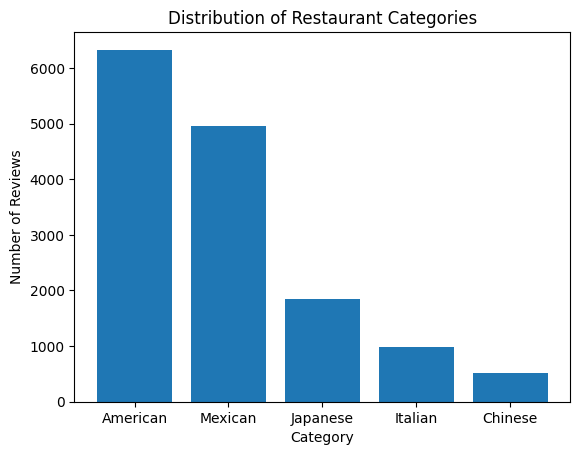

In [19]:
# Graph of five cuisine distribution
import matplotlib.pyplot as plt

category_counts = five_cuisine_df['category'].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Restaurant Categories')
plt.show()


In [ ]:
five_cuisine_df.to_csv('five_cuisine_df.csv', index=False)